## Introducation
The dataset we use for the assignment is from [Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease), which can be used to preict the chronic kidney disease. 
The data has 24 features, we import this data as two parts. The first part is X, which is the explanatory variable. The another part is called y, which is response variable, i.e. the status of chronic kidney disease.  

In [1568]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 

print(X)

y


      age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...  hemo   pcv    wbcc  rbcc  htn   dm  cad  appet

,class
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


In [1569]:
yclass = set(y["class"])
print(yclass)

{'notckd', 'ckd\t', 'ckd'}


1. Classification Problem Identification:

- Looking at the introduction of the predict variable y, it is catogorical and only assigned 2 types of observations: people who have chronical desease and people who does not have chronical desease. But look at the data, there is one addiction type which is called 'ckd\t', which could understanded as wrong input. In this case we convert group with this term to people who have chronical desease.

- The column of diabetes mellitus (dm) has same input error of "'\tno'", we also use the same trick to convert this into "no".

- The datatype of includes both catogorical data and nominal data, we need to convert the object into categorical data. Also,there is outliers in this data.

In [1570]:
for i in y["class"]:
    if i == "ckd\t":
        y["class"].replace("ckd\t", "ckd", inplace=True)


C:\Users\29657\AppData\Local\Temp\ipykernel_49220\1546460364.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  y["class"].replace("ckd\t", "ckd", inplace=True)
C:\Users\29657\AppData\Local\Temp\ipykernel_49220\1546460364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["class"].replace("ckd\t", "ckd", inplace=True)


In [1571]:
yclass = set(y["class"])
yclass

{'ckd', 'notckd'}

In [1572]:
X.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [1573]:
obj_columns =["rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane"]
num_categories = X[obj_columns].nunique()
num_categories

rbc      2
pc       2
pcc      2
ba       2
htn      2
dm       3
cad      2
appet    2
pe       2
ane      2
dtype: int64

In [1574]:
dmclass = set(X["dm"])
print(dmclass)
#we see the dm has same input error of "'\tno'"

{'\tno', 'yes', nan, 'no'}


In [1575]:
for i in X["dm"]:
    if i == "\tno":
        X["dm"].replace("\tno", "no", inplace=True)

C:\Users\29657\AppData\Local\Temp\ipykernel_49220\2459818985.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["dm"].replace("\tno", "no", inplace=True)
C:\Users\29657\AppData\Local\Temp\ipykernel_49220\2459818985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["dm"].replace("\tno", "no", inplace=True)


In [1576]:
dmclass = set(X["dm"])
print(dmclass)

{'yes', nan, 'no'}


2. Variable Transformation:

- We need to do the variable tranformation, which convert the catogorical data into 0 and 1. After that, we scale all numerical values to uniform the magnitude of each variable for better estimation. 

In [1577]:
## variable tranformation
import pandas as pd
obj_columns =["rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane"]
columns_to_convert_1 = ["pcc", "ba"]
columns_to_convert_2 = ["rbc", "pc"]
columns_to_convert_3 = ["htn", "dm", "cad", "pe", "ane"]
columns_to_convert_4 = ["appet"]

X_reg = X.copy()

for col in columns_to_convert_1:
    X_reg[col] = pd.Categorical(
        X_reg[col], 
        categories=["notpresent", "present"], 
        ordered=True
    )

for col in columns_to_convert_2:
    X_reg[col] = pd.Categorical(
        X_reg[col], 
        categories=["abnormal", "normal"], 
        ordered=True
    )

for col in columns_to_convert_3:
    X_reg[col] = pd.Categorical(
        X_reg[col], 
        categories=["no","yes"], 
        ordered=True
    )

for col in columns_to_convert_4:
    X_reg[col] = pd.Categorical(
        X_reg[col], 
        categories=["poor","good"], 
        ordered=True
    )


for col in obj_columns:
    X_reg[col] = X_reg[col].astype('category').cat.codes
X_reg.dtypes


age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc         int8
pc          int8
pcc         int8
ba          int8
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn         int8
dm          int8
cad         int8
appet       int8
pe          int8
ane         int8
dtype: object

In [1578]:
X_reg.head() #check the work

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,-1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,1,0,0
1,7.0,50.0,1.020,4.0,0.0,-1,1,0,0,NaN,...,11.3,38.0,6000.0,NaN,0,0,0,1,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,NaN,0,1,0,0,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,0,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,1,0,0


In [1579]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices, dmatrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm

- Scale the numerical values:

In [1580]:
numerical=X_reg.select_dtypes(include='float64').columns
numerical_data = X_reg[numerical]
scale = StandardScaler()
X_reg[numerical] = scale.fit_transform(numerical_data)
X_reg.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,-0.203139,0.258373,0.454071,-0.012548,-0.410106,-1,1,0,0,-0.341498,...,0.988022,0.569881,-0.206202,0.481295,1,1,0,1,0,0
1,-2.594124,-1.936857,0.454071,2.208413,-0.410106,-1,1,0,0,NaN,...,-0.421688,-0.098536,-0.818559,NaN,0,0,0,1,0,0
2,0.613295,0.258373,-1.297699,0.727772,2.323069,1,1,0,0,3.473064,...,-1.006202,-0.878356,-0.308261,NaN,0,1,0,0,0,1
3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,1,0,1,0,-0.392022,...,-0.456071,-0.766953,-0.580420,-0.788961,1,0,0,0,1,1
4,-0.028189,0.258373,-1.297699,0.727772,-0.410106,1,1,0,0,-0.530963,...,-0.318538,-0.432744,-0.376301,-0.104977,0,0,0,1,0,0


3. Dataset Overview: 

In [1581]:
X.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [1582]:
X.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

- Other than the introduction we introduced at the beginning. The dataset suppose to caontains 400 observations for each variable. 
- The explanatory variables include: age, blood pressure(bp), specific gravity(sg), albumin(al), sugar(su), red blod cells(rbc), pus cell(pc), pus cell clumps(pcc), bacteria(ba), blood glucose random(bgr), blood urea(bu), serum creatinine(sc), sodium(sod), potassium(pot), hemoglobin(hemo), packed cell volume(pcv), white blood cell count(wc), red blood cell count(rc), hypertension(htn), diabetes mellitus(dm), coronary artery disease(cad), appetite(appet), pedal edema(pe), anemia(ane), and class. 
- From the summary of the dataset, however, we can see thare are many missing values sine the counts for each column are not precisely 400, this situation will be fixed for later operation. 
- The dataset had two types, *float64 (numerical)* and *object (categorical)*. After the transformation we did in **Part 2**, the types become *float64* and *int8* respectively. In addition, the distributions of the dataset is analyzed as follows. 

c:\Users\29657\anaconda3\envs\proj03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\29657\anaconda3\envs\proj03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\29657\anaconda3\envs\proj03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\29657\anaconda3\envs\proj03\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

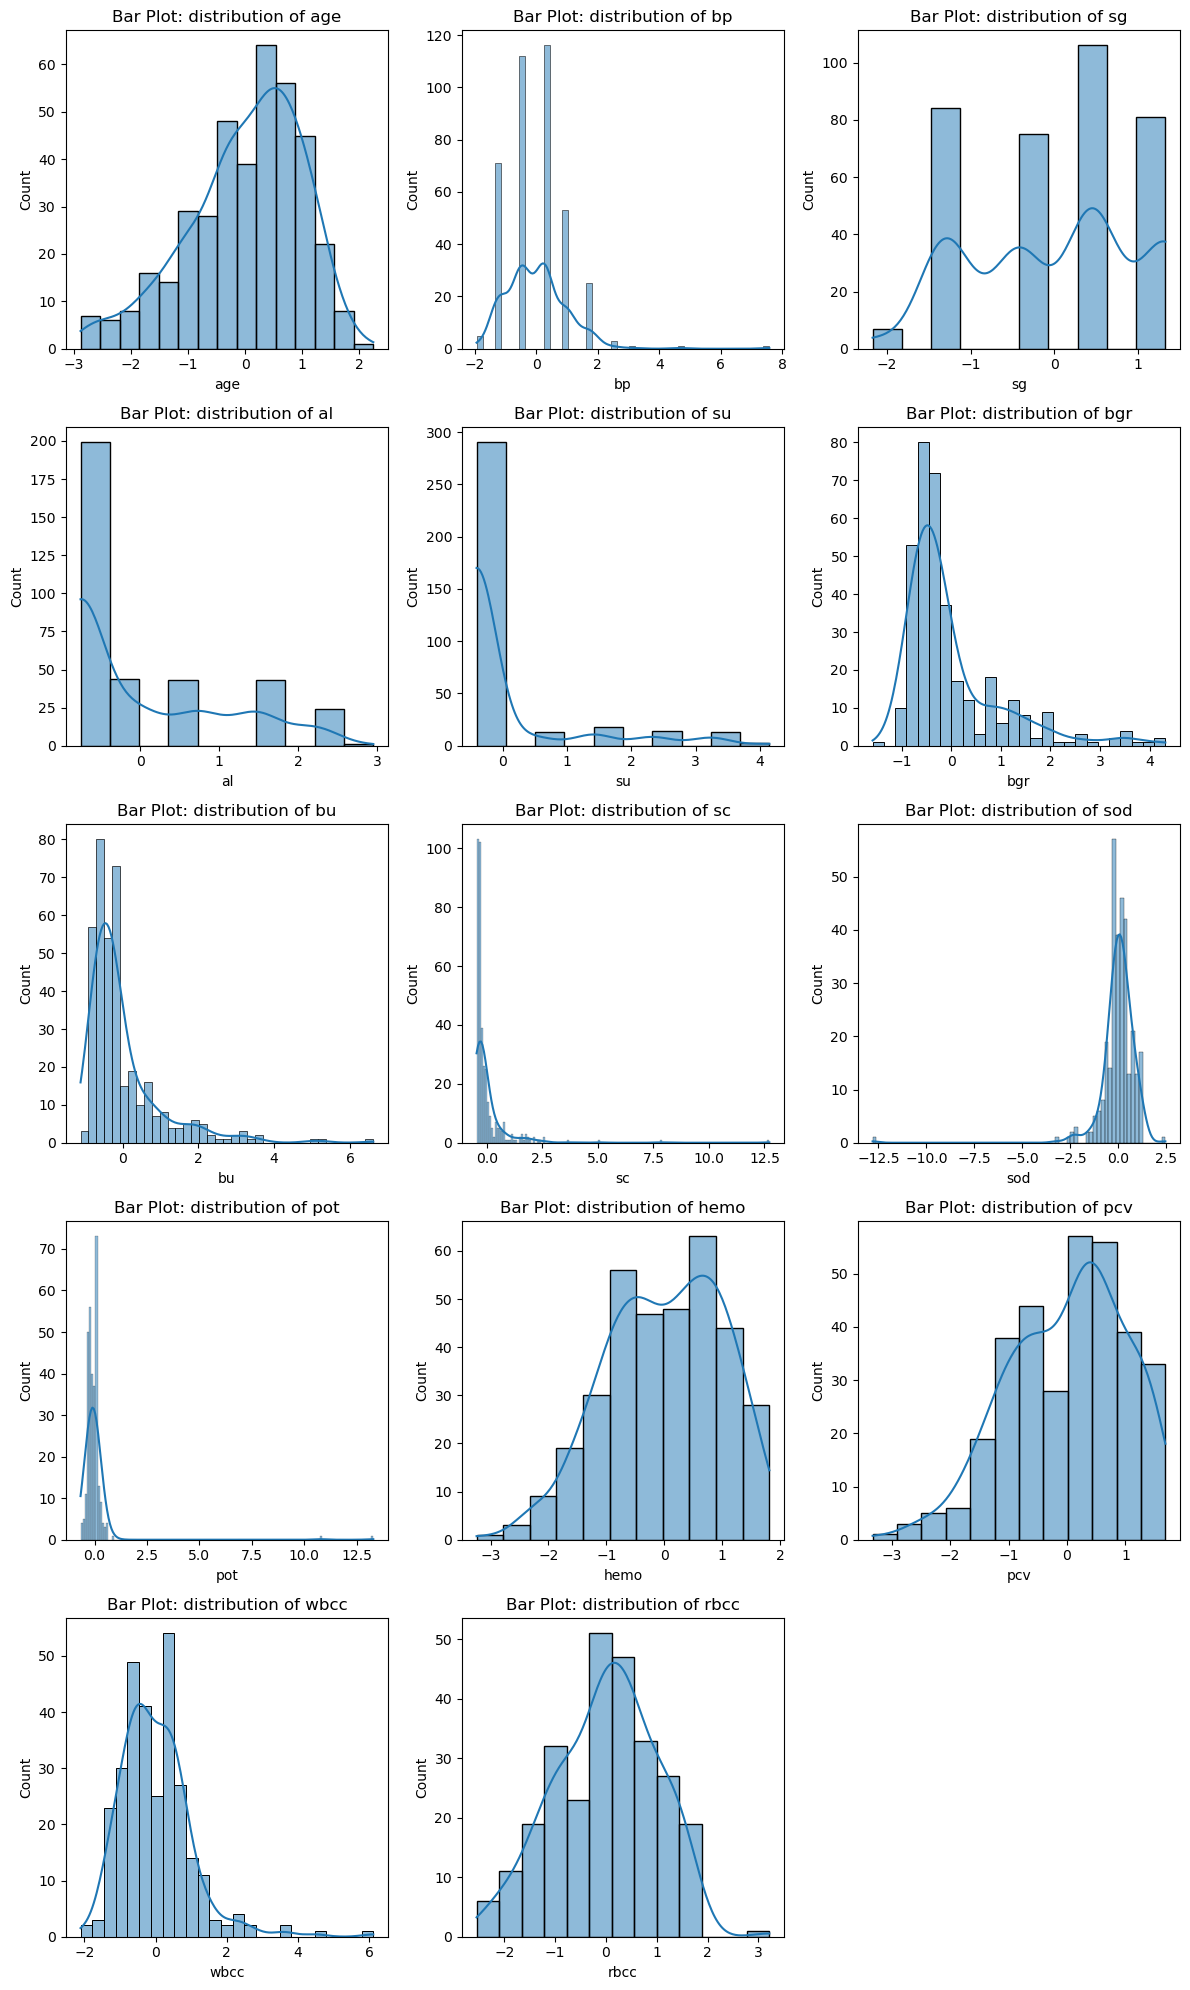

In [1583]:
n_rows = 5
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes_flat = axes.flatten()

for i, term in enumerate(numerical):
    sns.histplot(
        data=X_reg,
        x=term,
        kde=True,
        cbar="blues",
        ax=axes_flat[i] 
    )
    axes_flat[i].set_xlabel(term)
    axes_flat[i].set_ylabel("Count")
    axes_flat[i].set_title("Bar Plot: distribution of " + term)

for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()

4. Association Between Variables
- We use two methods to analyze the association between these variables. Firstly, we use heat map to analyze the association between all numerical datas. After that, we use histogram to analyze the association between all categorical variables. 

<Axes: >

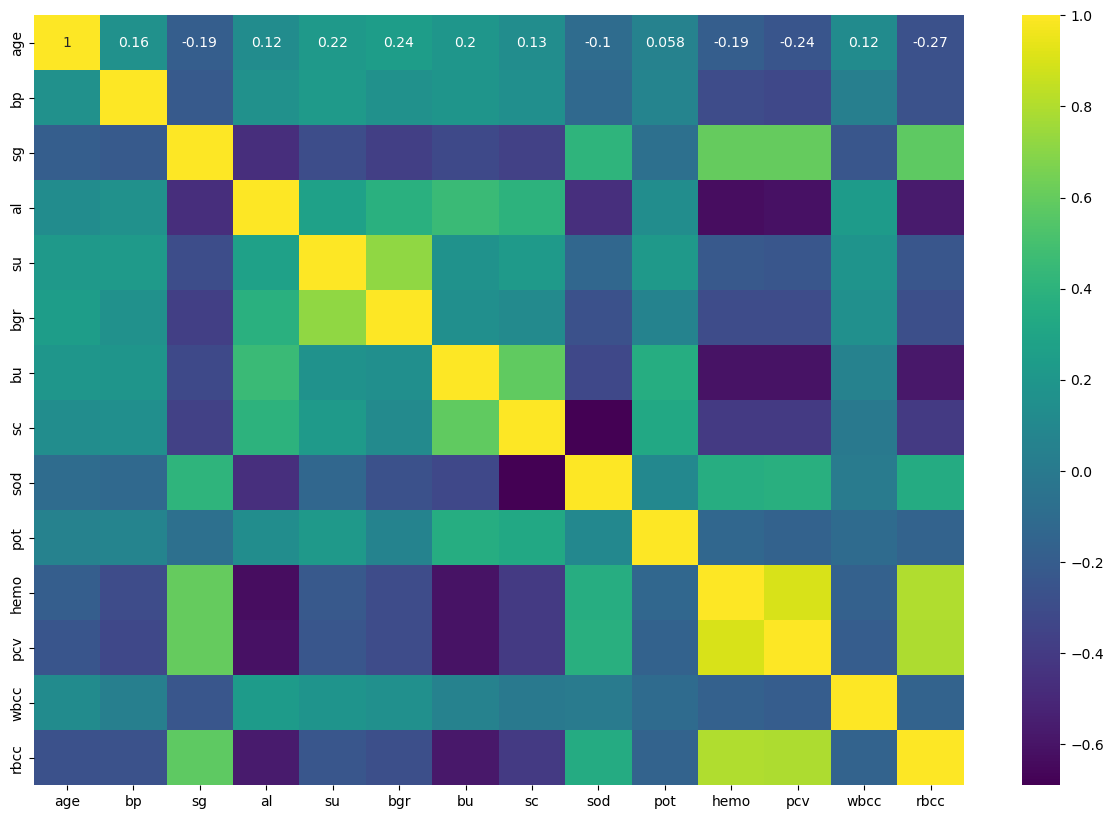

In [1584]:
plt.figure(figsize=(15, 10))
sns.heatmap(X_reg[numerical].corr(), annot=True,cmap='viridis')

- According to the heatmap, lighter colour represent a higher association and vise versa. For example, pcv, hemo, and rbcc has high association with each other. However, the heatmap shows that all numerical variables have a less association overall because most of them are under 0.5. 

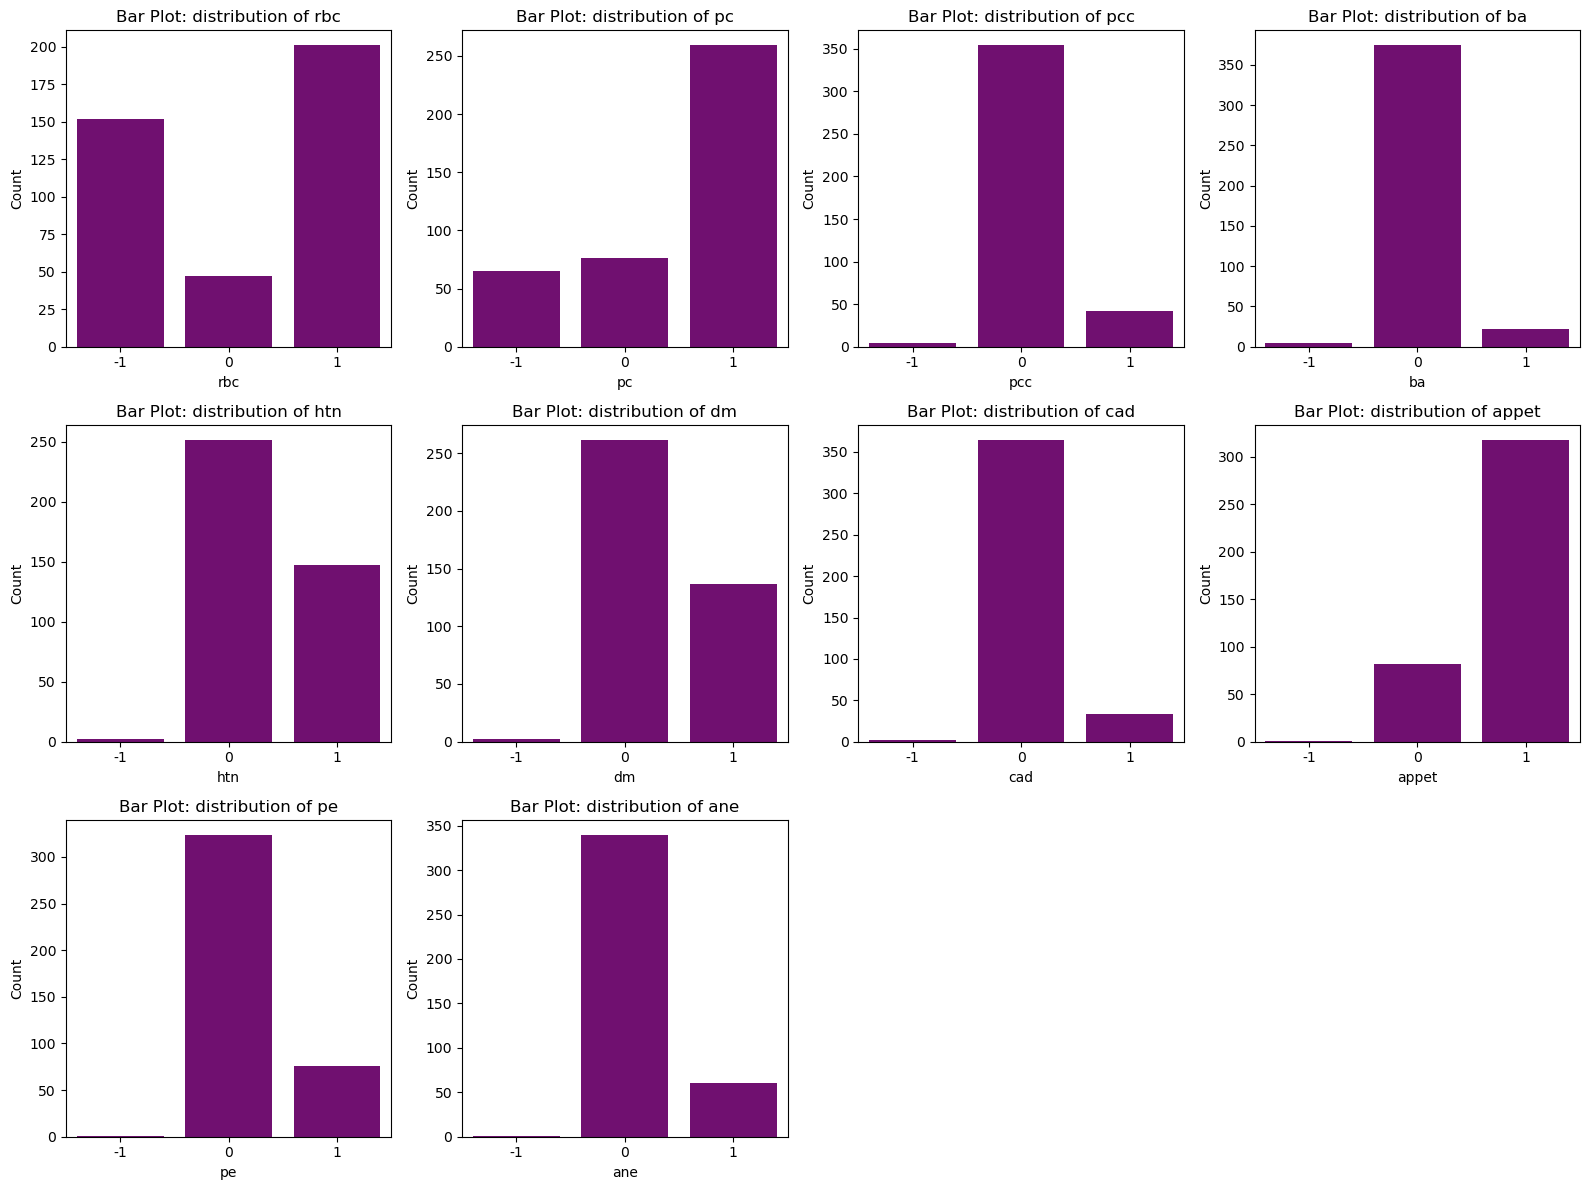

In [1585]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical=X_reg.select_dtypes(include='int8').columns

n_rows = 3
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes_flat = axes.flatten()

for i, term in enumerate(categorical):
    sns.countplot(
        data=X_reg,
        x=term,
        color="purple",
        ax=axes_flat[i] 
    )
    axes_flat[i].set_xlabel(term)
    axes_flat[i].set_ylabel("Count")
    axes_flat[i].set_title("Bar Plot: distribution of " + term)

for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes_flat[j])

plt.tight_layout()

plt.show()


- From  histograms, we can see the implication of these categorical variables for feature selection. For example, the histogram of rbc has many missing values so it may not be significant for feature selection. 

5. Missing Value Analysis and Handling

In [1586]:
X.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

- From above, we can see there are missing values everywhere. We decided to remove variables that have more than 50 missing values because too many missing values result in an inaccurate analysis. 

In [1587]:
m_value = X_reg.isna().sum()

m_value_df = pd.DataFrame(m_value, columns=["missing values"])
bigm = m_value_df[m_value_df["missing values"]>50].index
bigm

Index(['sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc'], dtype='object')

In [1588]:
from sklearn.impute import KNNImputer

X_new = X_reg.drop(columns=bigm)
imputer = KNNImputer(n_neighbors=5)
X_new = pd.DataFrame(imputer.fit_transform(X_new), columns=X_new.columns)
X_new.isna().sum()
X_new

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,htn,dm,cad,appet,pe,ane
0,-0.203139,0.258373,0.454071,-0.012548,-0.410106,-1.0,1.0,0.0,0.0,-0.341498,-0.424804,-0.326574,1.0,1.0,0.0,1.0,0.0,0.0
1,-2.594124,-1.936857,0.454071,2.208413,-0.410106,-1.0,1.0,0.0,0.0,-0.740638,-0.781687,-0.396338,0.0,0.0,0.0,1.0,0.0,0.0
2,0.613295,0.258373,-1.297699,0.727772,2.323069,1.0,1.0,0.0,0.0,3.473064,-0.087748,-0.221928,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,1.0,0.0,1.0,0.0,-0.392022,-0.028268,0.126891,1.0,0.0,0.0,0.0,1.0,1.0
4,-0.028189,0.258373,-1.297699,0.727772,-0.410106,1.0,1.0,0.0,0.0,-0.530963,-0.623073,-0.291692,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,0.454071,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.101509,-0.167055,-0.448661,0.0,0.0,0.0,1.0,0.0,0.0
396,-0.553039,-0.473370,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.922524,-0.523939,-0.326574,0.0,0.0,0.0,1.0,0.0,0.0
397,-2.302541,0.258373,0.454071,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.606749,-0.623073,-0.431220,0.0,0.0,0.0,1.0,0.0,0.0
398,-2.010957,-1.205114,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,-0.429915,-0.147229,-0.361456,0.0,0.0,0.0,1.0,0.0,0.0


6. Outlier Analysis:

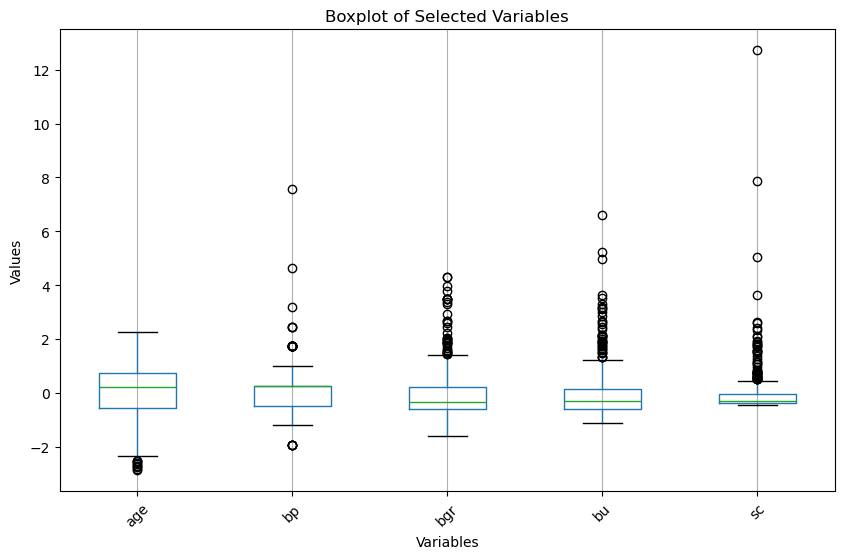

In [1589]:
new_columns =['age', 'bp', 'bgr', 'bu', 'sc']

boxplot_data = X_new[new_columns]

plt.figure(figsize=(10, 6)) 
boxplot_data.boxplot()
plt.title('Boxplot of Selected Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.show()

In [1590]:
outlier_indices = X_new.index[X_new.apply(lambda x: (x > 6).any(), axis=1)].tolist()
outlier_indices

[21, 61, 99, 148]

In [1591]:
X_new = pd.DataFrame(X_new, columns=['age', 'bp', 'sg', 'al', 'su']) 
X_new = X_new[(X_new <= 6).all(axis=1)] 
X_new.describe()

,age,bp,sg,al,su
count,399.000000,399.000000,399.000000,399.000000,399.000000
mean,0.002036,-0.028455,-0.024483,0.030498,0.027385
std,0.994489,0.915869,0.956115,0.966265,0.951539
min,-2.885708,-1.936857,-2.173584,-0.752868,-0.410106
25%,-0.553039,-0.473370,-0.596991,-0.752868,-0.410106
50%,0.205078,0.258373,-0.071460,-0.752868,-0.410106
75%,0.729928,0.258373,0.454071,0.727772,-0.319000
max,2.246163,4.648834,1.329955,2.948733,4.145186


8. Data Splitting:

In [1592]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.30, random_state=0, stratify=y)

ValueError: Found input variables with inconsistent numbers of samples: [399, 400]

In [ ]:
## decision tree

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier, Lasso, ElasticNet, RidgeClassifierCV, LassoCV, ElasticNetCV

y['class'] = y["class"].astype('category').cat.codes
y

X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.25, random_state=0, stratify=y)

lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=10, max_iter=1500)

lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

#test MSE associated with this value of $\lambda$
m_lasso = Lasso(alpha=lasso_cv.alpha_)
m_lasso.fit(X_train, y_train) 
m_lasso_pre_logOdds = m_lasso.predict(X_test)

def logistic(x):
    return 1 / (1 + np.exp(-x))

m_lasso_pre_prob = logistic(m_lasso_pre_logOdds)
m_lasso_pre_prob

m_lasso_pre_prob_flat = np.ravel(m_lasso_pre_prob)
y_test_flat = np.ravel(y_test)
df = pd.DataFrame(data={'prob': m_lasso_pre_prob_flat, 'y_test': y_test_flat})
df

fpr, tpr, thresholds = roc_curve(df.y_test, df.prob)
ks_statistic = np.max(tpr - fpr)
ks_threshold = thresholds[np.argmax(tpr - fpr)]
ks_threshold

ind = np.where(np.isclose(thresholds, ks_threshold, atol=0.001))
print(tpr[ind])
print(1-fpr[ind])
df['y_test_pred'] = df.prob.map(lambda x: 1 if x>ks_threshold else 0)
accuracy_score(df.y_test, df.y_test_pred)

m_lasso.coef_

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

##forward selection
sfs = SFS(
    lasso_cv,
    k_features=(1,15),
    forward=True,
    floating=False,
    scoring='neg_mean_squared_error',
    cv=5
    )

sfs = sfs.fit(X_train, y_train)

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. CV StdErr)')
plt.grid()
plt.show()

X_train.columns[list(sfs.k_feature_idx_)]

sel_col = X_train.columns[list(sfs.k_feature_idx_)]
X_train_sfs = X_train[sel_col]
X_test_sfs = X_test[sel_col]

fpr, tpr, thresholds = roc_curve(df.y_test, df.prob)
ks_statistic = np.max(tpr - fpr)
ks_threshold = thresholds[np.argmax(tpr - fpr)]
ks_threshold

lasso_cv.fit(X_train_sfs, y_train)
sfs_predict = lasso_cv.predict(X_test_sfs)
np.sqrt(metrics.mean_squared_error(y_test, sfs_predict))

lasso_cv.coef_

m_lasso_pre_prob_new = logistic(sfs_predict)
m_lasso_pre_prob_new

m_lasso_pre_prob_new_flat = np.ravel(m_lasso_pre_prob_new)
y_test_new_flat = np.ravel(y_test)
df_new = pd.DataFrame(data={'prob': m_lasso_pre_prob_new, 'y_test': y_test_new_flat})
df_new


indnew = np.where(np.isclose(thresholds, 0.6621, atol=0.001))
print(tpr[indnew])
print(1-fpr[indnew])
df_new['y_test_pred_2new'] = df_new.prob.map(lambda x: 1 if x>0.6621 else 0)
accuracy_score(df_new.y_test, df_new.y_test_pred_2new)

8 ~ 10 (By Dicision Tree)

9: There are a few reasons why we use Decision Tree. First, we realize that the predicted value follows binary distribution so we use Classification Tree to predict the discrete label. In addition, the Decision Tree can be used for handling mixed data types, which match the situation of our dataset.

In [ ]:
decision_tree = DecisionTreeClassifier(
    max_depth = 50, 
    random_state=1)

In [ ]:
#y = np.ravel(y)

In [ ]:
#y['class'] = y["class"].astype('category').cat.codes


In [1599]:
X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y, test_size=0.3, random_state=1, stratify=y)

In [1600]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=1)

[Text(0.6153846153846154, 0.9285714285714286, 'hemo <= 0.214\ngini = 0.469\nsamples = 280\nvalue = [175, 105]\nclass = ckd'),
 Text(0.46153846153846156, 0.7857142857142857, 'rbcc <= 0.384\ngini = 0.07\nsamples = 166\nvalue = [160, 6]\nclass = ckd'),
 Text(0.38461538461538464, 0.6428571428571429, 'sod <= 1.056\ngini = 0.024\nsamples = 162\nvalue = [160, 2]\nclass = ckd'),
 Text(0.3076923076923077, 0.5, 'bu <= -0.831\ngini = 0.012\nsamples = 161\nvalue = [160, 1]\nclass = ckd'),
 Text(0.23076923076923078, 0.35714285714285715, 'pcv <= inf\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = ckd'),
 Text(0.15384615384615385, 0.21428571428571427, 'hemo <= inf\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = ckd'),
 Text(0.07692307692307693, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.23076923076923078, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.3076923076923077, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = ckd'),
 Text(0.38461538461538464, 0.357142857142857

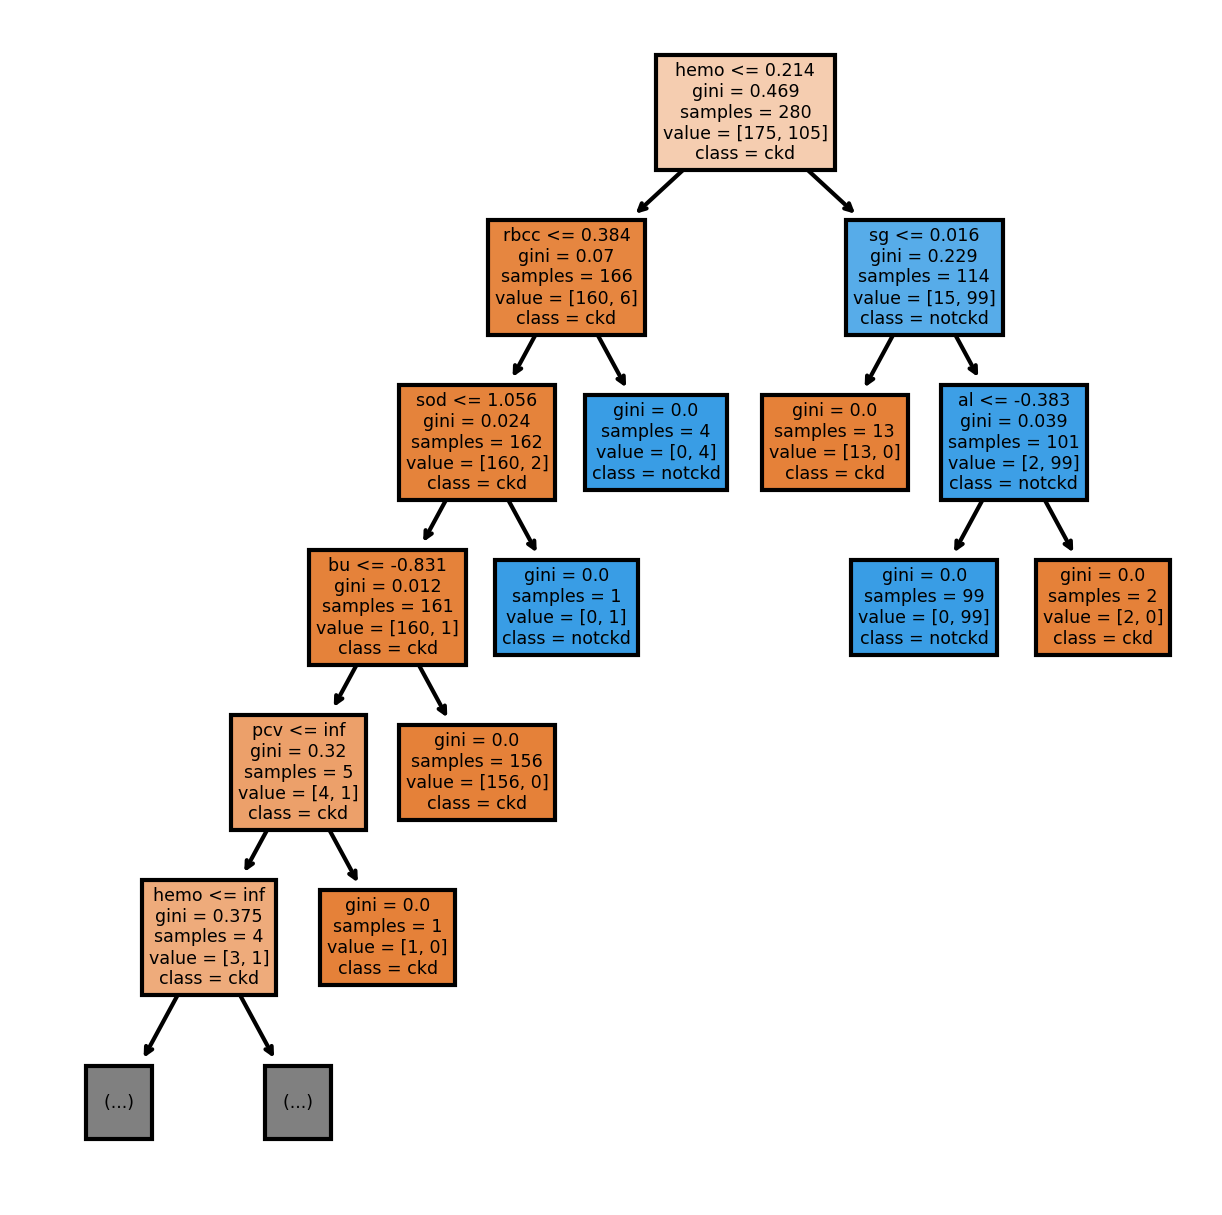

In [ ]:
fig, axes = plt.subplots(
    nrows = 1,ncols = 1,figsize = (5,5), dpi=300
    )
plot_tree(
    decision_tree, 
    max_depth= 5, 
    feature_names = X_train.columns.tolist(), 
    class_names=['ckd', 'notckd'],
    filled = True
)

In [ ]:
pred = decision_tree.predict(X_test)

pred[:5]

array(['ckd', 'ckd', 'ckd', 'notckd', 'notckd'], dtype=object)

In [ ]:
con_matrix = confusion_matrix(y_test, pred)
cm = pd.DataFrame(con_matrix, index=['0', '1'], columns=['0', '1'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
cm

Predicted,0,1
True,,
0,73,2
1,3,42


In [ ]:
sensitivity = con_matrix[1,1]/(con_matrix[1,0]+con_matrix[1,1])
print('Sensitivity : ', sensitivity)

specificity = con_matrix[0,0]/(con_matrix[0,0]+con_matrix[0,1])
print('Specificity : ', specificity )

Sensitivity :  0.9333333333333333
Specificity :  0.9733333333333334


In [ ]:
decision_tree.score(X_test, y_test)

0.9583333333333334

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        75
           1       0.95      0.93      0.94        45

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



- From the output above, we can see that the precision of ckd is 0.96, which means 96% of the samples predicted as "ckd" are actually "ckd". And the precision of "notckd" is 0.95, which means 95% of the sampels predicted as "notckd" are correctly identified.

11. To get a better performance of decision tree

In [ ]:
path = decision_tree.cost_complexity_pruning_path(
    X_train, 
    y_train
)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = [] # save fitted trees with different alphas
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, 
        ccp_alpha=ccp_alpha
        )
    clf.fit(X_train, y_train)
    clfs.append(clf)

depth = [clf.tree_.max_depth for clf in clfs]
depth

[6, 3, 3, 2, 2, 1, 0]

In [ ]:
test_score = [clf.score(X_test, y_test) for clf in clfs]

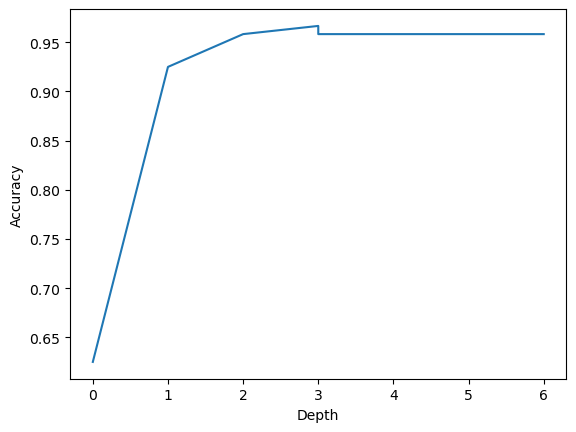

In [ ]:
plt.plot(depth, test_score)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

- We use the max_depth of **3** to fit the model.

In [1593]:
cs_dt_best = DecisionTreeClassifier(
    max_depth = 20, 
    random_state=1
    ) 

X_trainnew, X_testnew, y_trainnew, y_testnew = train_test_split(
    X_reg, y, test_size=0.3, random_state=1, stratify=y)

cs_dt_best.fit(X_reg, y)

DecisionTreeClassifier(max_depth=20, random_state=1)

In [1594]:
pred = cs_dt_best.predict(X_testnew)

cmnew = pd.DataFrame(confusion_matrix(y_testnew, pred), index=['notckd', 'ckd'], columns=['notckd', 'ckd'])
cmnew.index.name = 'True'
cmnew.columns.name = 'Predicted'
cmnew

Predicted,notckd,ckd
True,,
notckd,75,0
ckd,2,43


In [1595]:
decision_tree.score(X_testnew, y_testnew)

0.9583333333333334

- We use Pruning Tree to and the number of nods for each $\alpha$, and use accuracy to prue the tree. After that we test accuracy is maximum at depth 3.

13. Interpretable Classifier Insight: feature importance

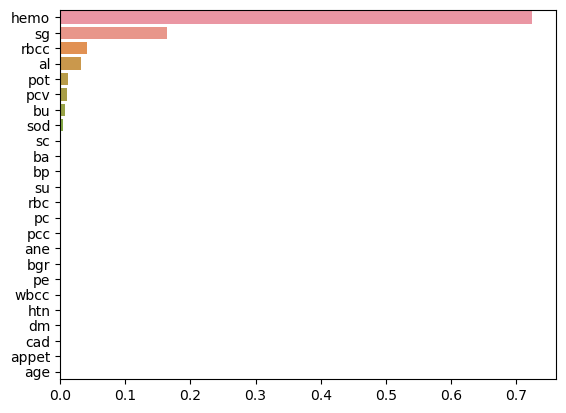

In [1596]:
fea_imp = cs_dt_best.feature_importances_

sorted_indices = fea_imp.argsort()[::-1]
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = fea_imp[sorted_indices]

sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.show()

- From the plot above, we can see that **sg** has the longest length, which indicates the most influence on the output of the model. For those features have very short bars represent low importance (they might be possible to exclude them from the mode). 

In [ ]:
##K-means
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm  # Import colormap directly from matplotlib.cm


In [ ]:
y['class'] = y["class"].astype('category').cat.codes
y

C:\Users\29657\AppData\Local\Temp\ipykernel_49220\3718594032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y["class"].astype('category').cat.codes


,class
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


In [ ]:
y['class'] = y["class"].astype('category').cat.codes

km1 = KMeans(n_clusters=2, n_init=20, random_state=0)
km1.fit(X_new)
km1.labels_

C:\Users\29657\AppData\Local\Temp\ipykernel_49220\1745536279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y["class"].astype('category').cat.codes
c:\Users\29657\anaconda3\envs\proj03\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

c:\Users\29657\anaconda3\envs\proj03\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\29657\anaconda3\envs\proj03\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\29657\anaconda3\envs\proj03\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\29657\anaconda3\envs\proj03\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

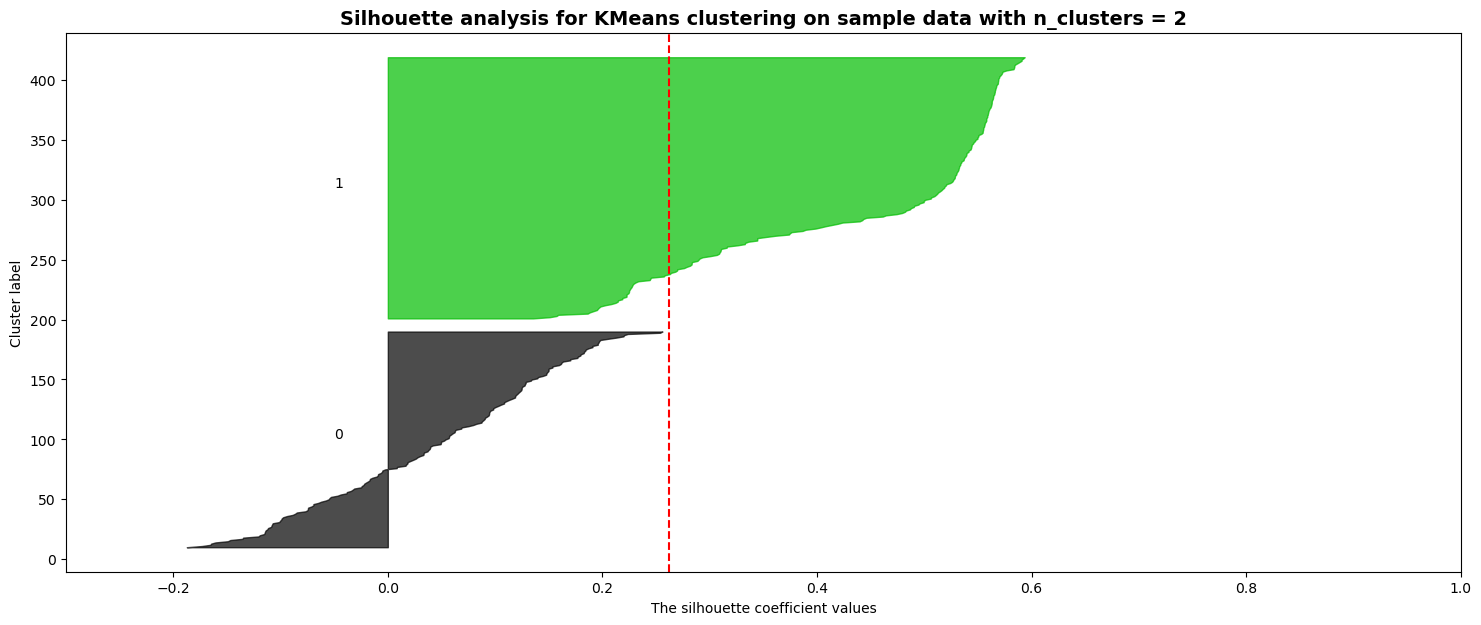

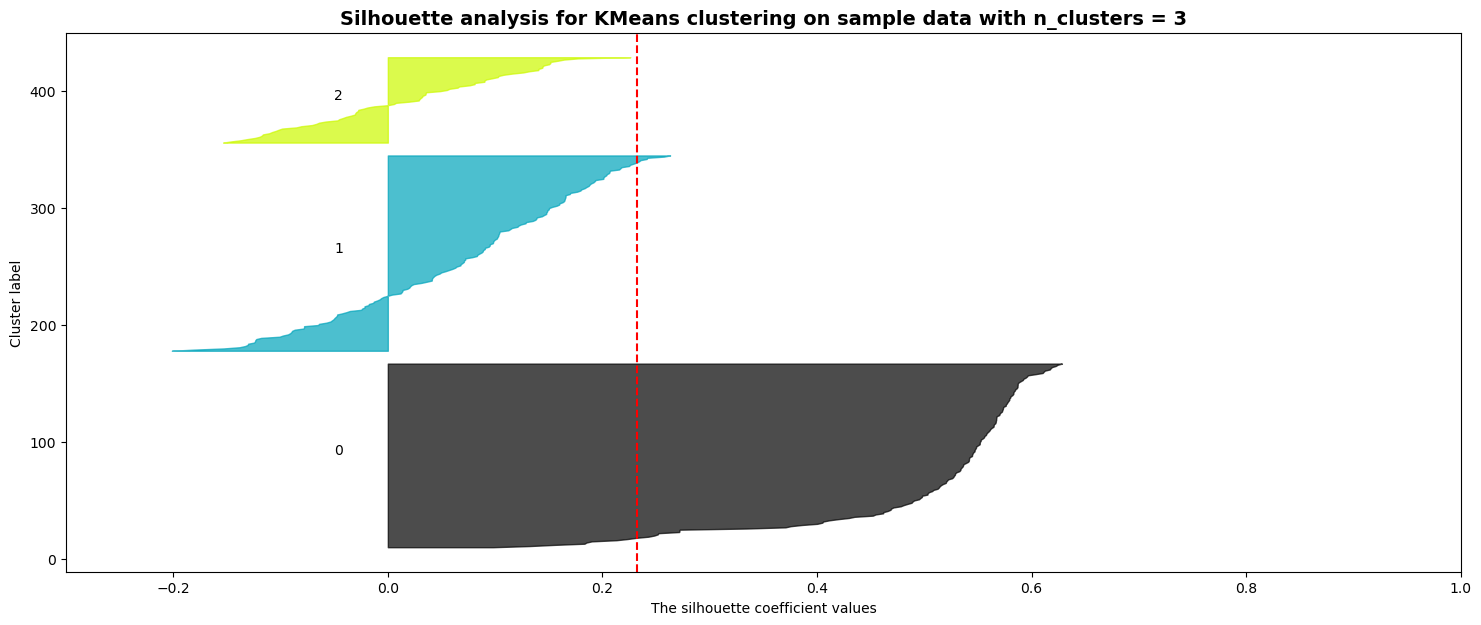

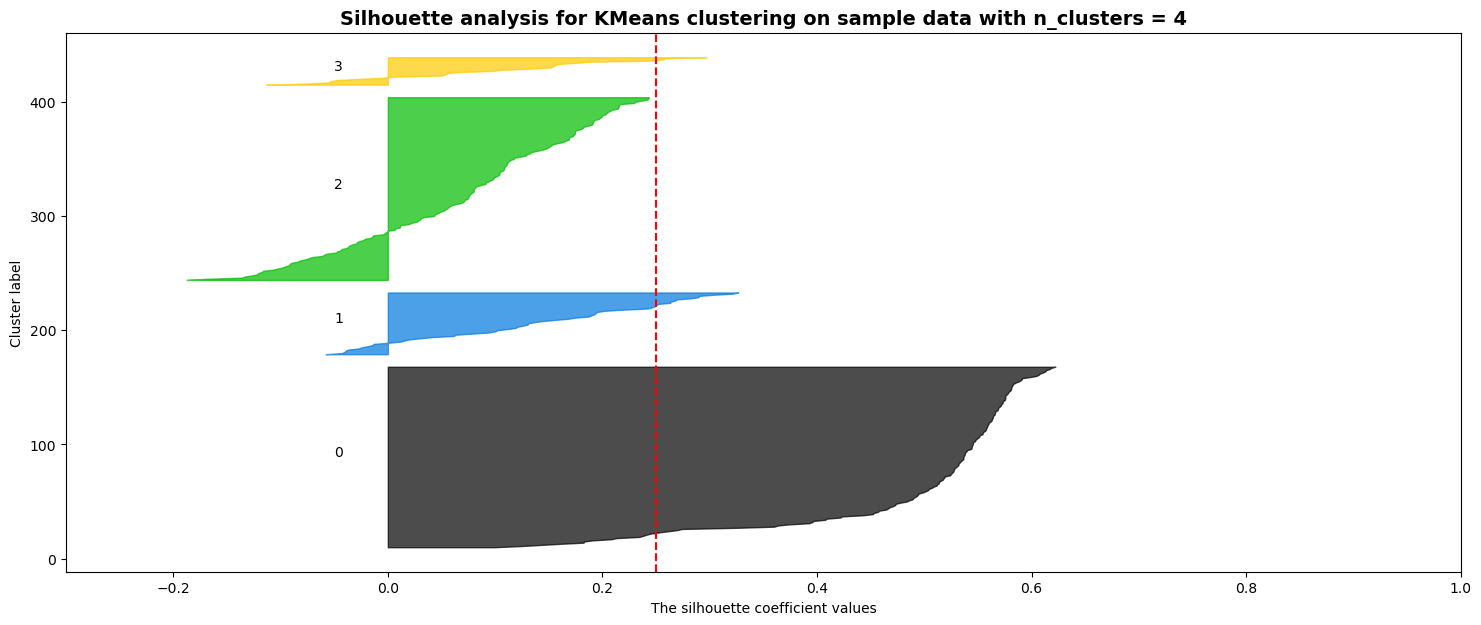

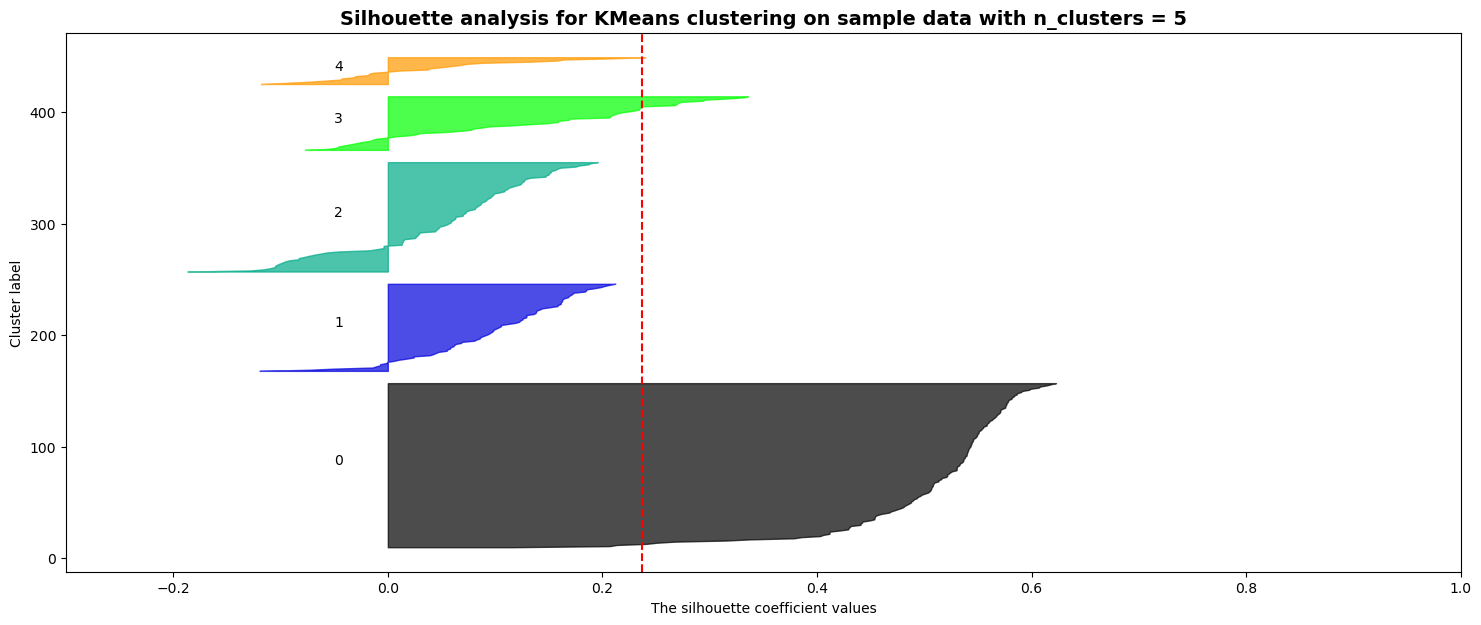

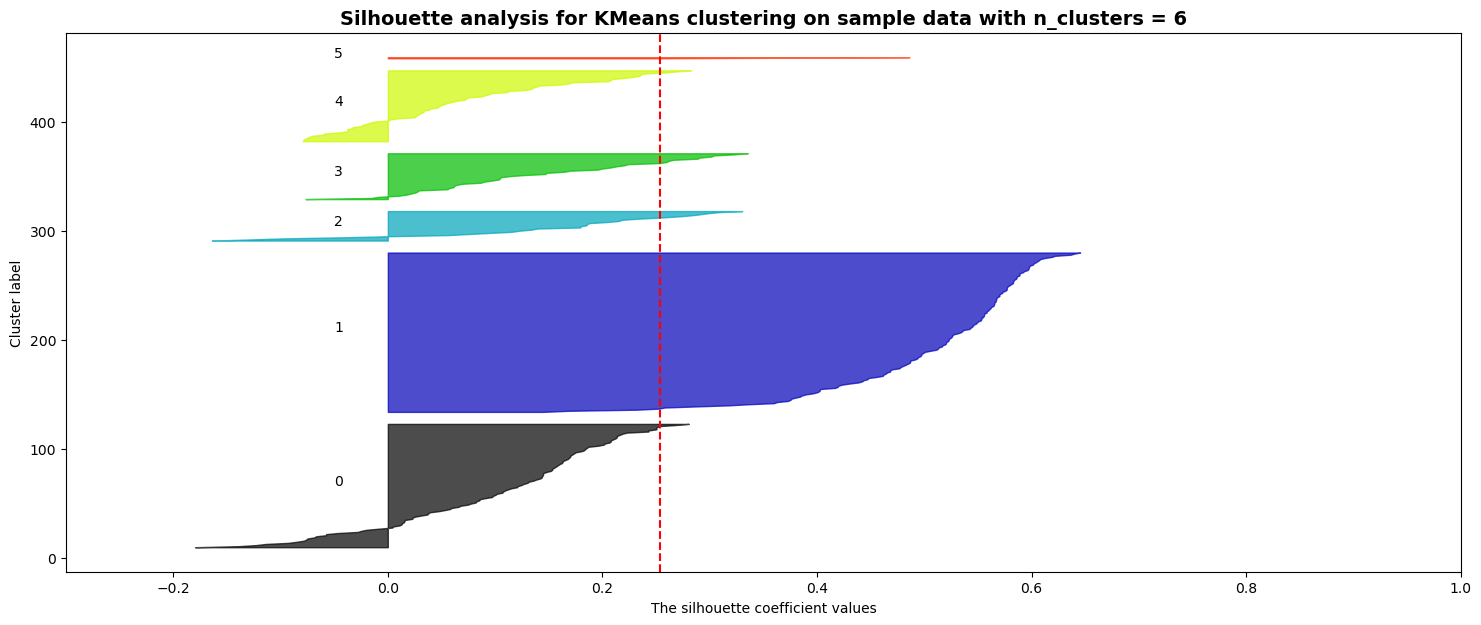

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, n_init=20, random_state=0)
    labels = km.fit_predict(X_new)
    
    silhouette_avg = silhouette_score(X_new, labels)
    sample_silhouette_values = silhouette_samples(X_new, labels)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.3, 1])

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            y=np.arange(y_lower, y_upper),
            x1=0,
            x2=ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
#pick 5
kmeans = KMeans(n_clusters=2, n_init=20, random_state=0)
labels = kmeans.fit_predict(X_new)
labels

c:\Users\29657\anaconda3\envs\proj03\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#we have to do PCA
pca_X = PCA()
X = pd.DataFrame(X_new, X_new.index, X_new.columns)

In [ ]:
pca_loading = pd.DataFrame(pca_X.fit(X).components_.T, index=X_new.columns, columns=[['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
            'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18']])
pca_loading

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18
age,0.252166,-0.170886,-0.302234,0.537177,-0.539020,-0.433965,0.090866,0.089503,0.020876,-0.063656,-0.116554,0.063281,0.019178,-0.083221,-0.032954,-0.028228,0.029735,0.005620
bp,0.233096,-0.051838,-0.349312,0.379237,0.805267,-0.115524,-0.032182,0.061855,0.064380,0.032980,-0.026139,0.015247,-0.047544,-0.026436,0.018968,-0.011583,0.009821,-0.027933
sg,-0.358375,-0.004811,0.148136,0.418848,-0.016689,0.123741,-0.690101,0.143979,-0.370764,-0.123951,-0.049212,0.010727,0.006357,0.044242,0.017344,-0.061484,-0.011726,0.004917
al,0.353735,0.163518,0.282163,-0.363793,0.103104,-0.481754,-0.216270,0.395348,-0.163392,-0.207298,-0.280343,-0.021033,-0.068423,-0.043520,-0.174687,0.005829,0.048819,-0.046574
su,0.330426,-0.445827,0.310517,0.095098,0.028405,0.311376,-0.029043,-0.045974,0.251718,-0.617971,0.064763,0.102993,0.117022,0.032368,-0.040587,0.071836,-0.064827,-0.008347
rbc,-0.231199,0.143048,0.630391,0.358085,0.102296,-0.329385,0.147149,0.067871,0.425577,0.163008,0.207682,-0.047404,0.009044,-0.013358,-0.035500,0.019975,0.016145,-0.000718
pc,-0.221879,-0.076966,0.169940,0.130474,0.147248,-0.099359,0.602714,-0.049855,-0.635852,-0.301040,-0.040277,-0.040012,0.007835,-0.002275,0.001236,-0.058389,0.001139,-0.002211
pcc,0.057978,0.003053,0.047795,-0.029595,-0.003773,-0.110960,0.017368,0.025700,0.027145,0.047821,-0.128220,0.134949,0.242113,0.557553,0.489490,-0.330425,-0.271995,-0.387632
ba,0.034162,0.013311,0.030778,-0.022713,0.028585,-0.069299,0.006625,0.032940,0.022200,-0.018246,-0.088893,0.129857,-0.008644,0.248431,0.263503,-0.094207,-0.050025,0.906780
bgr,0.345283,-0.442812,0.358420,0.063956,0.003524,0.156847,-0.002629,-0.038163,-0.270928,0.630834,-0.178328,0.029929,-0.051359,-0.125447,0.056770,0.004616,0.015526,0.012487


In [ ]:
pc_scores = pd.DataFrame(pca_X.fit_transform(X), columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
            'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18'], index=X.index)
pc_scores

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18
0,-0.343353,-0.305315,-0.961757,-0.327305,0.253896,0.069184,-0.281181,0.120744,-1.025855,-0.275833,0.237469,-0.784162,-0.225187,0.273330,-0.094047,-0.208255,-0.193292,0.060329
1,-1.326773,0.633711,0.982807,-3.342223,0.090420,0.316809,-0.753783,0.861960,-1.169816,-0.914700,-0.813088,-0.168057,-0.147598,0.140640,-0.389672,0.052837,0.060181,-0.093761
2,2.630993,-2.598196,2.293258,0.369509,0.275706,-0.018666,1.033310,-0.257850,-0.089349,0.891153,-0.030557,0.668877,0.535485,-0.212852,-0.851480,-0.267365,0.548656,0.047193
3,1.340982,1.187068,0.752028,-1.905527,0.024584,-1.883050,0.746874,0.691579,0.734756,0.271041,0.512279,0.418810,1.029059,-0.096040,0.168198,0.079214,-0.217788,-0.404921
4,-0.369756,0.173091,0.129140,-0.543030,0.541855,-1.124458,1.239501,0.462208,0.688932,-0.031809,-0.310276,-0.046407,-0.122517,-0.193439,-0.262768,0.097675,0.132515,-0.080716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.201018,-0.153541,0.121550,0.927428,0.238077,-0.303758,0.288617,-0.270483,0.126085,0.270723,-0.152576,0.029067,-0.087237,-0.116086,0.045189,0.010632,0.028059,-0.002289
396,-2.248920,0.252439,0.389091,0.521389,0.038203,0.148079,-0.294799,0.089634,-0.004854,-0.297761,0.110956,-0.043632,0.027362,0.101284,0.023128,-0.043619,-0.004936,0.012497
397,-2.160302,0.275943,0.625286,-0.530580,1.599580,0.709336,0.112354,-0.146248,0.260271,0.149221,0.294188,-0.145035,-0.052838,0.146800,0.097018,0.053149,-0.028634,-0.017259
398,-2.496829,0.495296,1.321398,-0.447683,0.228983,0.928684,-0.451242,-0.387975,-0.256019,0.049766,0.158529,-0.132408,-0.038264,0.187677,0.087029,0.030878,-0.069000,0.026350


In [ ]:
var=pc_scores.var()
var

pc1     3.287509
pc2     1.360621
pc3     0.952058
pc4     0.911335
pc5     0.830053
pc6     0.716005
pc7     0.509868
pc8     0.337108
pc9     0.313569
pc10    0.271987
pc11    0.172467
pc12    0.134838
pc13    0.106161
pc14    0.101027
pc15    0.084368
pc16    0.073621
pc17    0.058445
pc18    0.044264
dtype: float64

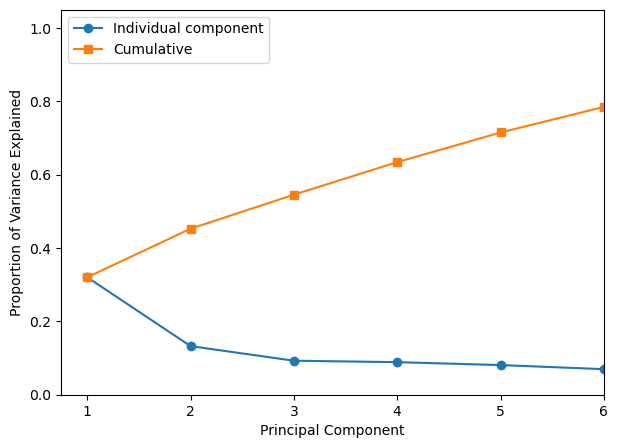

In [ ]:
plt.figure(figsize=(7,5))

plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
, pca_X.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
, np.cumsum(pca_X.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6])
plt.legend(loc=2);

In [ ]:
##choose 2
pca_loading

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18
age,0.252166,-0.170886,-0.302234,0.537177,-0.539020,-0.433965,0.090866,0.089503,0.020876,-0.063656,-0.116554,0.063281,0.019178,-0.083221,-0.032954,-0.028228,0.029735,0.005620
bp,0.233096,-0.051838,-0.349312,0.379237,0.805267,-0.115524,-0.032182,0.061855,0.064380,0.032980,-0.026139,0.015247,-0.047544,-0.026436,0.018968,-0.011583,0.009821,-0.027933
sg,-0.358375,-0.004811,0.148136,0.418848,-0.016689,0.123741,-0.690101,0.143979,-0.370764,-0.123951,-0.049212,0.010727,0.006357,0.044242,0.017344,-0.061484,-0.011726,0.004917
al,0.353735,0.163518,0.282163,-0.363793,0.103104,-0.481754,-0.216270,0.395348,-0.163392,-0.207298,-0.280343,-0.021033,-0.068423,-0.043520,-0.174687,0.005829,0.048819,-0.046574
su,0.330426,-0.445827,0.310517,0.095098,0.028405,0.311376,-0.029043,-0.045974,0.251718,-0.617971,0.064763,0.102993,0.117022,0.032368,-0.040587,0.071836,-0.064827,-0.008347
rbc,-0.231199,0.143048,0.630391,0.358085,0.102296,-0.329385,0.147149,0.067871,0.425577,0.163008,0.207682,-0.047404,0.009044,-0.013358,-0.035500,0.019975,0.016145,-0.000718
pc,-0.221879,-0.076966,0.169940,0.130474,0.147248,-0.099359,0.602714,-0.049855,-0.635852,-0.301040,-0.040277,-0.040012,0.007835,-0.002275,0.001236,-0.058389,0.001139,-0.002211
pcc,0.057978,0.003053,0.047795,-0.029595,-0.003773,-0.110960,0.017368,0.025700,0.027145,0.047821,-0.128220,0.134949,0.242113,0.557553,0.489490,-0.330425,-0.271995,-0.387632
ba,0.034162,0.013311,0.030778,-0.022713,0.028585,-0.069299,0.006625,0.032940,0.022200,-0.018246,-0.088893,0.129857,-0.008644,0.248431,0.263503,-0.094207,-0.050025,0.906780
bgr,0.345283,-0.442812,0.358420,0.063956,0.003524,0.156847,-0.002629,-0.038163,-0.270928,0.630834,-0.178328,0.029929,-0.051359,-0.125447,0.056770,0.004616,0.015526,0.012487


In [ ]:
PCA_var=sum(pca_X.explained_variance_ratio_[0:2])
PCA_var

0.4528000148085089

c:\Users\29657\anaconda3\envs\proj03\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


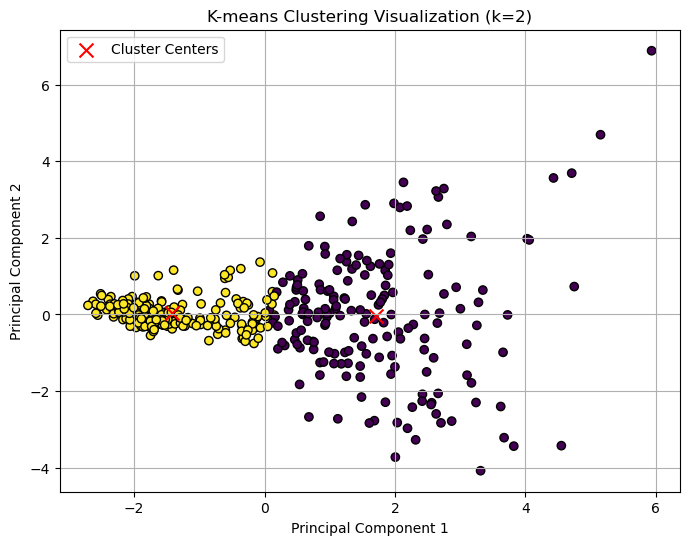

In [ ]:
plt.figure(figsize=(8, 6))

principal_components = pca_X.fit_transform(X)
kmeans = KMeans(n_clusters=2, n_init=20, random_state=0)
kmeans.fit(principal_components)
cluster_labels = kmeans.labels_

# Plot data points
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red', s=100, label='Cluster Centers')

plt.title('K-means Clustering Visualization (k=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_1d = np.ravel(y)

adjusted_Rand_index = adjusted_rand_score(y_1d, cluster_labels)

adjusted_Rand_index


0.42736867465518685

[github link]("https://github.com/Zichuan66/Assignment-6")